In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flight.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
dataframe.head()

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   index                              103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# **EDA**

**Non-numerical values**

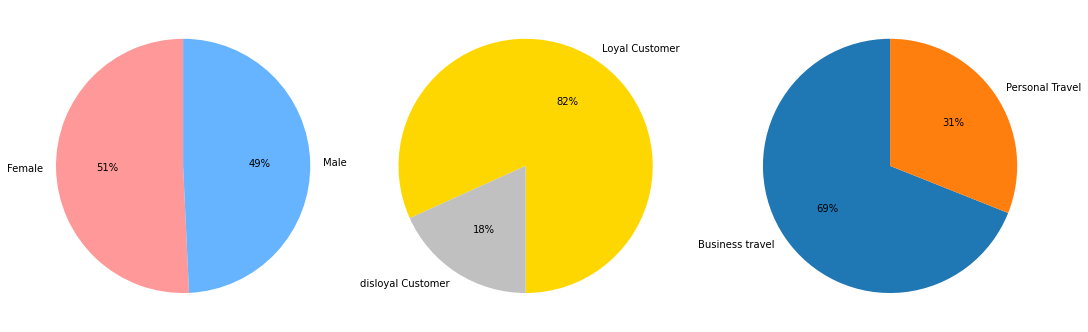

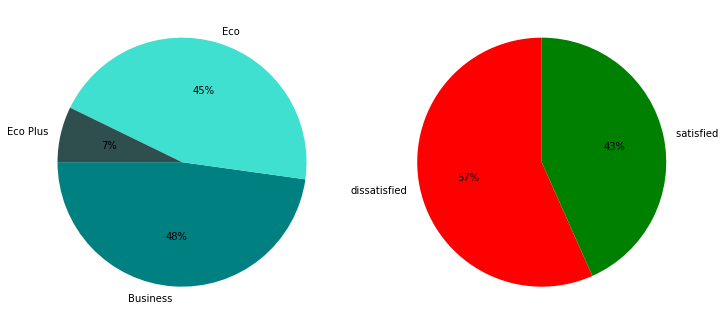

In [167]:
# create subplot 1
f, (ax1, ax2,ax3) = plt.subplots(1, 3,constrained_layout=True,figsize=(15, 10))
# pie chart for gender
y=dataframe.Gender.value_counts(normalize=True)
ax1.pie(y,labels=['Female','Male'],startangle = 90,colors = ['#ff9999','#66b3ff'],autopct='%1.0f%%')
#piechart for Customer Type
y=dataframe['Customer Type'].value_counts(normalize=True)
ax2.pie(y,labels=['Loyal Customer','disloyal Customer'],startangle = 270,autopct='%1.0f%%',colors=["gold","silver"])
# #piechart for Type of Travel
ax3.pie(dataframe['Type of Travel'].value_counts(normalize=True),labels=['Business travel','Personal Travel'],startangle = 90,autopct='%1.0f%%');
# create subplot 2
f, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True,figsize=(10, 7))
# #piechart for Type of Class
class_colors=["teal","turquoise","darkslategrey"]
ax1.pie(dataframe['Class'].value_counts(normalize=True),labels=['Business','Eco','Eco Plus'],startangle = 180,autopct='%1.0f%%',colors=class_colors)
#Pie chart for satisfaction
ax2.pie(dataframe['satisfaction'].value_counts(normalize=True),labels=['dissatisfied','satisfied '],colors=["red","green"],startangle = 90,autopct='%1.0f%%');

**Numerical values**

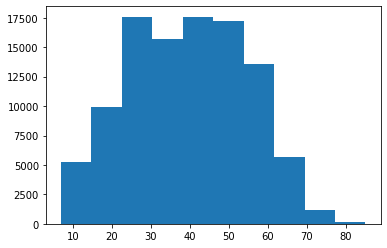

In [168]:
#plot for Age
plt.hist(dataframe.Age)
plt.show()

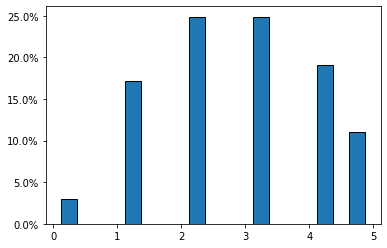

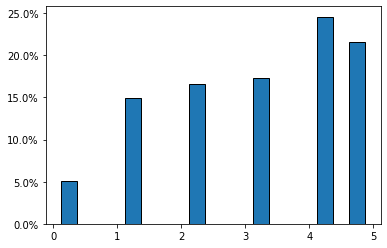

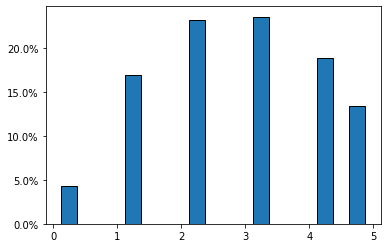

In [245]:
from matplotlib.ticker import PercentFormatter
# # create subplot 
# # f, ((ax1, ax2,ax3),(ax4, ax5,ax4),(ax7, ax8,ax9),(ax10, ax11,ax12)) = plt.subplots(4, 3,constrained_layout=True,figsize=(15, 10))
cols=dataframe.columns[8:11]
for col in cols:
  # sns.displot(dataframe,x=dataframe[col],height=3.5, aspect=1.9,stat='percent',kind="hist");
  # print( dataframe[col])
  # y=dataframe[col].plot.hist(bins=5,  alpha=0.5, histtype='bar', ec='black',title=col)
  data=dataframe[col]
  plt.hist(data,alpha=0.5, histtype='bar', ec='black',rwidth=0.5, weights=np.ones(len(data)) / len(data),)
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  # plt.hist(dataframe[col])
  plt.show()
# sns.displot(dataframe,x=dataframe["Departure/Arrival time convenient"],height=3.5, aspect=1.9,stat='percent',kind="hist")

In [ ]:
# # Let's calculate the percentage of each gender status category.
# dataframe.Gender.value_counts(normalize=True)
# #plot the bar graph of percentage gender categories
# dataframe.Gender.value_counts(normalize=True).plot.barh()
# plt.show()